## Historical Pricing : Retrieve data for a variety of asset classes

This notebook demonstrates how to use Historical Pricing API to retrieve data for a range of asset classes.

## Assets:

### Equity Index & Constituents
- **.SPX** : S&P 500 INDEX
- **.DJI** : DOW JONES INDUSTRIAL AVERAGE INDEX
- **.STOXX50E** : EURO STOXX 50 EUR PRICE INDEX
- **.FTSE** : FTSE 100 INDEX
- **.N225** : NIKKEI 225 INDEX
- **.HSI** : HANG SENG INDEX

*retrieving constituents requires use of QA Direct and is outlined in a separate notebook*


### Volatilty Index
- **.VIX** : CBOE MARKET VOLATILITY INDEX

### Stocks
- **IBM.N** IBM, INTERNATIONAL BUSINESS MACHINES CORP (New York Stock Exchange)
- **AAPL.O** Apple Inc (NASDAQ Global Select Consolidated)


### Spot Gold & Spot Silver
- **XAU=** : Spot Gold 
- **XAG=** : Spot Silver

### FX
- **GBP=** : UK POUND STERLING/US DOLLAR FX SPOT RATE 

### Treasury Yield Index
- **.TNX** : CBOE 10 YEAR TREASURY YIELD INDEX

### ETF's
- **SPY.P**  : SPDR S&P 500 ETF Trust
- **CSP1.L** : iShares Core S&P 500 UCITS ETF
- **1306.T** : Nomura TOPIX ETF

### Futures Equity Index
*Note that here we retrieve the continuation RIC, suffixed with 'c1', not the individual contract rics*
- **FFIc1** : Futures FTSE Index
- **ESc1**  :  Futures eMini S&P Index

### Futures Commodities
- **CMCUc1** : LME Cash Copper Composite Commodity Future
- **LCOc1**  : Futures Brent Crude (spot month)
- **CLc1**   : NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation



In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
import warnings 
import pyodbc
%matplotlib inline
plt.style.use('seaborn')

In [2]:
pd.set_option('display.max_columns', None)  # this will output all columns when display a pandas dataframe
pd.set_option('display.max_rows', None)  # this will output all columns when display a pandas dataframe

DSA Credentials for Historical Pricing API

In [3]:
RESOURCE_ENDPOINT = "https://dsa-stg-edp-api.fr-nonprod.aws.thomsonreuters.com/data/historical-pricing/beta1/views/summaries/" 
access_token = '26GtCASt7F4X37PrBL1Ml8fcxFwZoCc84afAZThY'  # your personal key for Data Science Accelerator access to Pricing Data

## S&P 500 data : A simple example
This example shows explictly shows how call the end of day pricing API to retrieve daily data (we'll move this code into functions in the next example).

The output is displayed in simple table and chart.

Data access successful


,DATE,TRDPRC_1,OPEN_PRC,HIGH_1,LOW_1
0,2018-05-01,100.1647,100.1647,100.1647,100.1647
1,2018-04-30,100.4361,100.4361,100.4361,100.4361
2,2018-04-27,100.2571,100.2571,100.2571,100.2571
3,2018-04-26,100.0196,100.0196,100.0196,100.0196
4,2018-04-25,99.7660,99.7660,99.7660,99.7660


,DATE,TRDPRC_1,OPEN_PRC,HIGH_1,LOW_1
119,2017-11-07,104.26,104.26,104.26,104.26
120,2017-11-06,104.18,104.18,104.18,104.18
121,2017-11-03,103.96,103.96,103.96,103.96
122,2017-11-02,103.92,103.92,103.92,103.92
123,2017-11-01,103.70,103.70,103.70,103.70


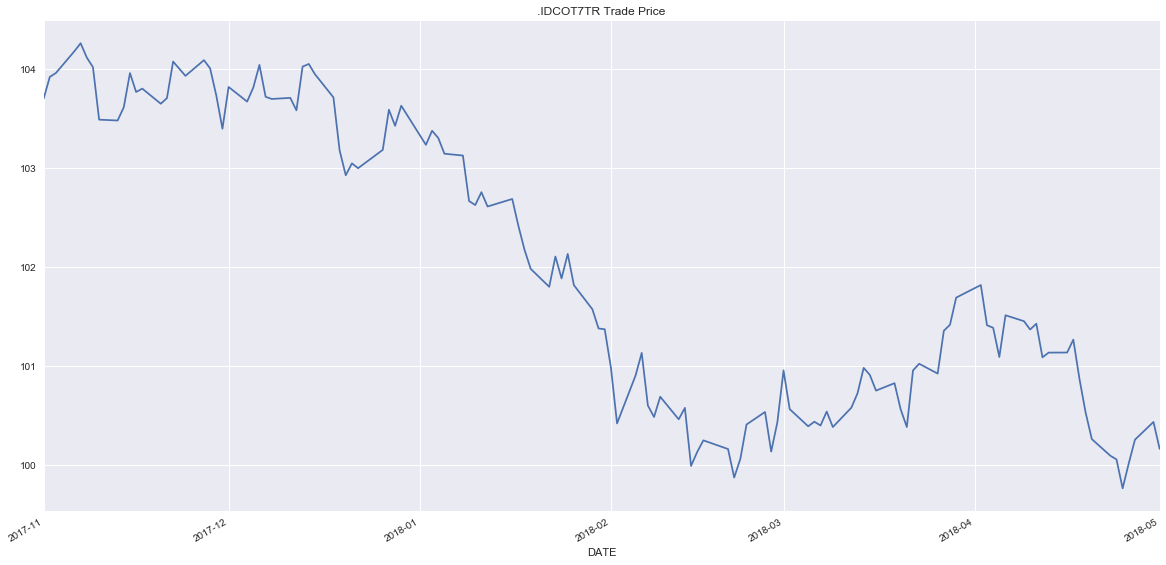

In [16]:
ric = '.IDCOT7TR'

start_date = '2017-11-01'
end_date = '2018-05-01'

resource_endpoint_ric = RESOURCE_ENDPOINT + ric

requestData = {
    "interval": "P1D",
    "start": start_date,
    "end": end_date
};

dResp = requests.get(resource_endpoint_ric, headers = {'X-api-key': access_token}, params = requestData);       
    
if dResp.status_code != 200:
    print("Unable to get data. Code %s, Message: %s" % (dResp.status_code, dResp.text));
else:
    print("Data access successful")
    jResp = json.loads(dResp.text);
    

if jResp is not None:
    data = jResp[0]['data']
    headers = jResp[0]['headers']  
    names = [headers[x]['name'] for x in range(len(headers))]
    data_price = pd.DataFrame(data, columns=names )
    display(data_price.head())
    display(data_price.tail())
    
    # Plot the results
    data_price.set_index(pd.to_datetime(data_price['DATE']), inplace=True)
    data_price['TRDPRC_1'].plot(title= ric + ' Trade Price',figsize=(20, 10))
else:
    print('no data returned')

## Create some helper functions
Cleaning up the above code will make it a bit easier to call the API for a variety of RIC's.

In [5]:
# Global functions - make HTTP GET reqeust
def get_data_request(url, requestData):
    dResp = requests.get(url, headers = {'X-api-key': access_token}, params = requestData);       
    
    if dResp.status_code != 200:
        print("Unable to get data. Code %s, Message: %s" % (dResp.status_code, dResp.text));
    else:
        print("Data access successful")
        jResp = json.loads(dResp.text);
        return jResp

In [18]:
def get_historical_pricing_data(ric, start_date='2017-01-01', end_date='2018-01-01'):
    """
    Helper function to return a dataframe from historical pricing API
    """
    
    requestData = {
        "interval": "P1D",
        "start": start_date,
        "end": end_date
    };
    
    resource_end_point_ric = RESOURCE_ENDPOINT + ric
    
    jResp = get_data_request(resource_end_point_ric, requestData)
    
    ret_value = None
    
    if jResp is not None:
        data = jResp[0]['data']
        headers = jResp[0]['headers']  
        names = [headers[x]['name'] for x in range(len(headers))]
        ret_value = pd.DataFrame(data, columns=names )
    else:
        print('no data for RIC={0}'.format(ric))
        
    return ret_value  

In [21]:
get_historical_pricing_data('.IDCOT7TR').head()

Data access successful


,DATE,TRDPRC_1,OPEN_PRC,HIGH_1,LOW_1
0,2017-12-29,103.6289,103.6289,103.6289,103.6289
1,2017-12-28,103.4258,103.4258,103.4258,103.4258
2,2017-12-27,103.5884,103.5884,103.5884,103.5884
3,2017-12-26,103.1832,103.1832,103.1832,103.1832
4,2017-12-22,102.9981,102.9981,102.9981,102.9981


We can now retrieve the data with a single call to the above function. 

**Note:** In the functions above, 
- the date variables are keyword arguments with default values
- the API will return all available fields, we could limit that if required

In [7]:
df_price_data = get_historical_pricing_data('.SPX')
display(df_price_data.head(), df_price_data.tail())

Data access successful


,DATE,TRDPRC_1,OPEN_PRC,HIGH_1,LOW_1,ACVOL_UNS,ASK,THEO_OPEN,BID,NUM_MOVES
0,2017-12-29,2673.61,2689.15,2692.12,2673.61,None,2697.81,None,2640.48,24602.0
1,2017-12-28,2687.54,2686.10,2687.66,2682.69,None,2706.60,None,2652.25,24602.0
2,2017-12-27,2682.62,2682.10,2685.64,2678.91,None,2706.36,None,2648.34,24602.0
3,2017-12-26,2680.50,2679.09,2682.74,2677.96,None,2704.95,None,2646.27,24602.0
4,2017-12-22,2683.34,2684.22,2685.35,2678.13,None,2704.19,None,2648.75,24602.0


,DATE,TRDPRC_1,OPEN_PRC,HIGH_1,LOW_1,ACVOL_UNS,ASK,THEO_OPEN,BID,NUM_MOVES
246,2017-01-09,2268.90,2273.59,2275.49,2268.90,None,2292.20,None,2244.07,24602.0
247,2017-01-06,2276.98,2271.14,2282.10,2264.06,None,2300.59,None,2249.80,24602.0
248,2017-01-05,2269.00,2268.18,2271.50,2260.45,None,2291.60,None,2243.65,24602.0
249,2017-01-04,2270.75,2261.60,2272.82,2261.60,None,2290.53,None,2236.73,24602.0
250,2017-01-03,2257.83,2251.57,2263.88,2245.13,None,2279.28,None,2229.06,24602.0


## A selection of Equity Indices
We can also loop over a selection of RIC's, in this case a some of the major Equity Indices.

Each dataframe is store in an Python dict, with the key the Index RIC.

In [8]:
equity_index_price_data_dict = dict()

equity_index_ric_list = ['.SPX', '.DJI', '.STOXX50E', '.FTSE', '.N225', '.HSI']

for ric in equity_index_ric_list:
    print('RIC: {0}'.format(ric))
    try:
        equity_index_price_data_dict[ric] = get_historical_pricing_data(ric)
    except:
        print('failed for ric {0}'.format(ric))

RIC: .SPX
Data access successful
RIC: .DJI
Data access successful
RIC: .STOXX50E
Data access successful
RIC: .FTSE
Data access successful
RIC: .N225
Data access successful
RIC: .HSI
Data access successful


Output a single index from the above results

In [9]:
print('*' * 80, '\n', 'Dow Jones Industrial Average Index')
display(equity_index_price_data_dict['.DJI'].head(5))   

******************************************************************************** 
 Dow Jones Industrial Average Index


,DATE,TRDPRC_1,OPEN_PRC,HIGH_1,LOW_1,ACVOL_UNS,ASK,THEO_OPEN,BID,NUM_MOVES
0,2017-12-29,24719.22,24849.63,24871.66,24719.22,270762444.0,24767.55,24855.34,24638.86,24602.0
1,2017-12-28,24837.51,24807.21,24839.23,24797.13,200962924.0,24877.03,24837.16,24784.49,24602.0
2,2017-12-27,24774.30,24766.52,24789.52,24731.68,225885903.0,24825.39,24782.43,24716.46,24602.0
3,2017-12-26,24746.21,24715.84,24778.13,24708.42,208286634.0,24775.61,24722.80,24701.52,24602.0
4,2017-12-22,24754.06,24764.04,24784.15,24717.51,255140781.0,24808.11,24774.71,24710.47,24602.0


In [10]:
for k,v in equity_index_price_data_dict.items():
    print('{0} earliest date: {1}'.format(k, v['DATE'].min()))

.SPX earliest date: 2017-01-03
.DJI earliest date: 2017-01-03
.STOXX50E earliest date: 2017-01-02
.FTSE earliest date: 2017-01-03
.N225 earliest date: 2017-01-04
.HSI earliest date: 2017-01-03


# Addtional Asset Classes: 
### Volatilty Index
- **.VIX** : CBOE MARKET VOLATILITY INDEX

### Stocks
- **IBM.N** IBM, INTERNATIONAL BUSINESS MACHINES CORP (New York Stock Exchange)
- **AAPL.O** Apple Inc (NASDAQ Global Select Consolidated)


### Spot Gold & Spot Silver
- **XAU=** : Spot Gold 
- **XAG=** : Spot Silver

### FX
- **GBP=** : UK POUND STERLING/US DOLLAR FX SPOT RAT   

### Treasury Yield Index
- **.TNX** : CBOE 10 YEAR TREASURY YIELD INDEX

### ETF's
- **SPY.P**  : SPDR S&P 500 ETF Trust
- **CSP1.L** : iShares Core S&P 500 UCITS ETF
- **1306.T** : Nomura TOPIX ETF

### Futures Equity Index
*Note that here we retrieve the continuation RIC, suffixed with 'c1', not the individual contract rics*
- **FFIc1** : Futures FTSE Index
- **ESc1**  :  Futures eMini S&P Index

### Futures Commodities
- **CMCUc1** : LME Cash Copper Composite Commodity Future
- **LCOc1**  : Futures Brent Crude (spot month)
- **CLc1**   : NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation


In [11]:
variety_of_assets_rics = ['.VIX', 'IBM.N','AAPL.O','FFIc1','ESc1','XAU=','XAG=', 
                          '.TNX','SPY.P','CSP1.L','1306.T','CMCU0','CLc1']

price_data_dict = dict()

for ric in variety_of_assets_rics:
    print('RIC: {0}'.format(ric))
    try:
        price_data_dict[ric] = get_historical_pricing_data(ric)
    except:
        print('failed for ric {0}'.format(ric))

RIC: .VIX
Data access successful
RIC: IBM.N
Data access successful
RIC: AAPL.O
Data access successful
RIC: FFIc1
Data access successful
RIC: ESc1
Data access successful
RIC: XAU=
Data access successful
RIC: XAG=
Data access successful
RIC: .TNX
Data access successful
RIC: SPY.P
Data access successful
RIC: CSP1.L
Data access successful
RIC: 1306.T
Data access successful
RIC: CMCU0
Data access successful
RIC: CLc1
Data access successful


Output data for a particular timeseries...

In [12]:
price_data_dict['CLc1']

,DATE,TRDPRC_1,OPEN_PRC,HIGH_1,LOW_1,ACVOL_UNS,BID,ASK,OPINT_1,SETTLE,NUM_MOVES,OPEN2,OPNRNGTP,MID_PRICE,BLKVOLUM,VWAP,UPLIMIT,LOLIMIT
0,2017-12-29,60.10,59.91,60.51,59.82,464478.0,60.10,60.21,466495.0,60.42,106920.0,None,1.0,60.155,4092.0,None,None,None
1,2017-12-28,59.89,59.53,59.94,59.44,345962.0,59.86,59.90,477796.0,59.84,85273.0,None,1.0,59.880,2279.0,None,None,None
2,2017-12-27,59.59,59.79,59.93,59.33,402396.0,59.58,59.62,481286.0,59.64,104967.0,None,1.0,59.600,1918.0,None,None,None
3,2017-12-26,59.80,58.40,60.01,58.32,437785.0,59.76,59.84,484886.0,59.97,110525.0,None,1.0,59.800,823.0,None,None,None
4,2017-12-22,58.35,58.21,58.50,57.87,324554.0,58.28,58.44,481977.0,58.47,84726.0,None,1.0,58.360,990.0,None,None,None
5,2017-12-21,58.23,58.02,58.38,57.63,405320.0,58.20,58.30,496545.0,58.36,100244.0,None,1.0,58.250,1103.0,None,None,None
6,2017-12-20,58.03,57.66,58.12,57.44,420844.0,58.02,58.06,510084.0,58.09,101834.0,None,1.0,58.040,712.0,None,None,None
7,2017-12-19,57.49,57.30,57.64,57.16,36286.0,NaN,NaN,6199.0,57.46,1696.0,None,1.0,NaN,500.0,None,None,None
8,2017-12-18,57.29,57.37,57.78,56.82,137151.0,56.86,57.48,29831.0,57.16,12117.0,None,1.0,57.170,6638.0,None,None,None
9,2017-12-15,57.36,57.15,57.49,56.94,210054.0,57.30,57.40,81291.0,57.30,47770.0,None,1.0,57.350,3319.0,None,None,None


Output the earliest date in the timeseries...

In [13]:
for k,v in price_data_dict.items():
    print('{0} earliest date: {1}'.format(k, v['DATE'].min()))

.VIX earliest date: 2017-01-03
IBM.N earliest date: 2017-01-03
AAPL.O earliest date: 2017-01-03
FFIc1 earliest date: 2017-01-02
ESc1 earliest date: 2017-01-03
XAU= earliest date: 2017-01-03
XAG= earliest date: 2017-01-03
.TNX earliest date: 2017-01-03
SPY.P earliest date: 2017-01-03
CSP1.L earliest date: 2017-01-03
1306.T earliest date: 2017-01-04
CMCU0 earliest date: 2017-01-03
CLc1 earliest date: 2017-01-03


## Intraday Prices

In [14]:
def get_intraday_pricing_data(ric, start_date='2019-06-28T15:00:00Z', end_date='2019-06-28T20:00:00Z', interval="PT1M"):
    """
    Helper function to return a dataframe from historical pricing API
    """
    
    requestData = {
        "interval": interval,
        "start": start_date,
        "end": end_date
    };
    
    resource_end_point_ric = RESOURCE_ENDPOINT + ric
    
    jResp = get_data_request(resource_end_point_ric, requestData)
    
    ret_value = None
    
    if jResp is not None:
        data = jResp[0]['data']
        headers = jResp[0]['headers']  
        names = [headers[x]['name'] for x in range(len(headers))]
        ret_value = pd.DataFrame(data, columns=names )
    else:
        print('no data for RIC={0}'.format(ric))
        
    return ret_value  

In [15]:
df_intraday_data = get_intraday_pricing_data('.SPX')
display(df_intraday_data.head(), df_intraday_data.tail())

Data access successful


,DATE_TIME,HIGH_1,LOW_1,OPEN_PRC,TRDPRC_1,NUM_MOVES,BID_HIGH_1,BID_LOW_1,OPEN_BID,BID,BID_NUMMOV,ASK_HIGH_1,ASK_LOW_1,OPEN_ASK,ASK,ASK_NUMMOV
0,2019-06-28T19:59:00.000000000Z,2941.21,2939.48,2940.58,2940.92,60,None,None,None,None,None,None,None,None,None,None
1,2019-06-28T19:58:00.000000000Z,2943.98,2941.24,2942.53,2941.24,60,None,None,None,None,None,None,None,None,None,None
2,2019-06-28T19:57:00.000000000Z,2942.71,2940.19,2940.21,2942.63,60,None,None,None,None,None,None,None,None,None,None
3,2019-06-28T19:56:00.000000000Z,2940.16,2939.11,2939.11,2940.16,60,None,None,None,None,None,None,None,None,None,None
4,2019-06-28T19:55:00.000000000Z,2939.26,2936.17,2936.17,2938.99,60,None,None,None,None,None,None,None,None,None,None


,DATE_TIME,HIGH_1,LOW_1,OPEN_PRC,TRDPRC_1,NUM_MOVES,BID_HIGH_1,BID_LOW_1,OPEN_BID,BID,BID_NUMMOV,ASK_HIGH_1,ASK_LOW_1,OPEN_ASK,ASK,ASK_NUMMOV
295,2019-06-28T15:04:00.000000000Z,2930.34,2929.85,2930.26,2929.88,60,None,None,None,None,None,None,None,None,None,None
296,2019-06-28T15:03:00.000000000Z,2930.28,2929.76,2930.02,2930.28,60,None,None,None,None,None,None,None,None,None,None
297,2019-06-28T15:02:00.000000000Z,2930.59,2929.82,2930.59,2929.90,60,None,None,None,None,None,None,None,None,None,None
298,2019-06-28T15:01:00.000000000Z,2931.24,2930.59,2931.19,2930.65,60,None,None,None,None,None,None,None,None,None,None
299,2019-06-28T15:00:00.000000000Z,2931.78,2931.07,2931.78,2931.20,60,None,None,None,None,None,None,None,None,None,None
